<a href="https://colab.research.google.com/github/Fayis-PV/100_ML_Projects/blob/main/Disease_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_file = '/content/sample_data/Training.csv'
df = pd.read_csv(train_file).dropna(axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
prognosis_index = df['prognosis'].value_counts()
prognosis_df = pd.DataFrame({
    'Disease': prognosis_index.index,
    'Count': prognosis_index.values
})


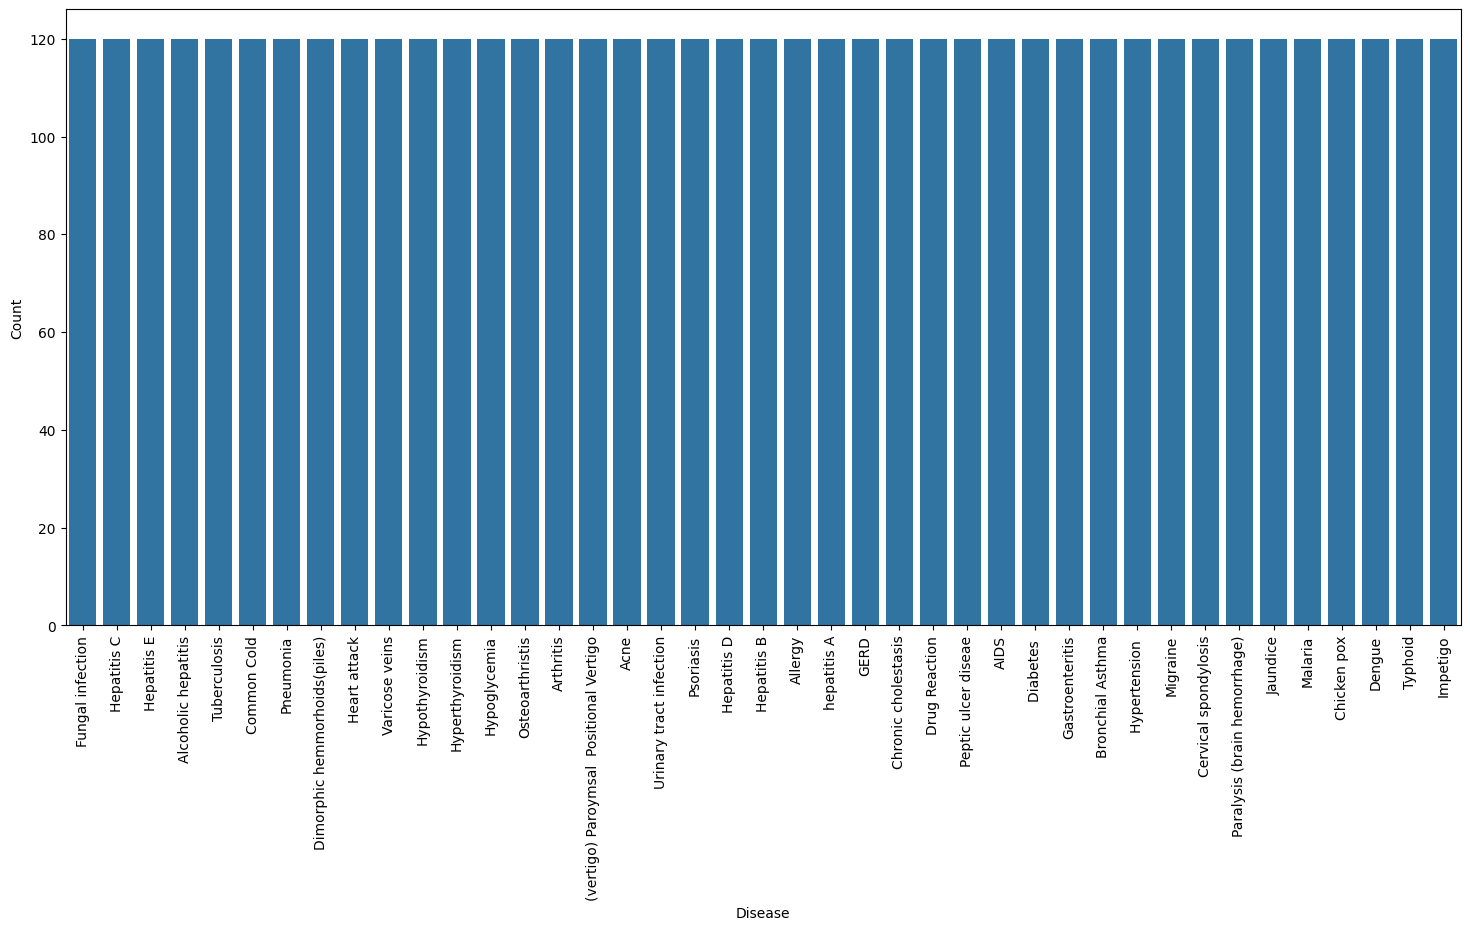

In [ ]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Disease', y='Count', data= prognosis_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

AttributeError: 'list' object has no attribute 'replace'